Exploration of the dataset

In [6]:
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [5]:
HOME_DIR = 'mbosnjak'
DATASETS_LOCATION = f'/home/{HOME_DIR}/Datasets/'
AUTHORS_DATA_LOCATION = DATASETS_LOCATION + 'author_profiles.csv'
COMMENTS_DATA_LOCATION = DATASETS_LOCATION + 'comments_style_stat.csv'
FEATURES_DATA_LOCATION = DATASETS_LOCATION + 'mb10k_features.csv'
COMMENTS_LOCATION = f'/home/{HOME_DIR}/Datasets/comments_last_100_min_20com_per_auth_w_wc_10_200_no_mbti.csv'

In [185]:
meh = pd.read_csv(AUTHORS_DATA_LOCATION)

In [153]:
meh.columns

Index(['author', 'mbti', 'introverted', 'intuitive', 'thinking', 'perceiving',
       'gender', 'age', 'enneagram', 'country', 'state', 'type',
       'agreeableness', 'openness', 'conscientiousness', 'extraversion',
       'neuroticism', 'is_description', 'is_percentile', 'is_score',
       'contains_details', 'num_comments', 'en_comments',
       'en_comments_percentage', 'region', 'continent', 'country_code',
       'enneagram_type', 'enneagram_wing', 'is_native_english_country',
       'predicted_test', 'test_name', 'test_scale', '16pers_ta',
       'test_result_type', 'is_female', 'is_female_pred', 'is_female_proba'],
      dtype='object')

             trait  value  value2
0      introverted    1.0     0.0
2      introverted    0.0     1.0
3      introverted    0.0     1.0
4      introverted    1.0     0.0
5      introverted    0.0     1.0
...            ...    ...     ...
41174   perceiving    1.0     0.0
41175   perceiving    0.0     1.0
41176   perceiving    0.0     1.0
41178   perceiving    0.0     1.0
41179   perceiving    0.0     1.0

[36315 rows x 3 columns]


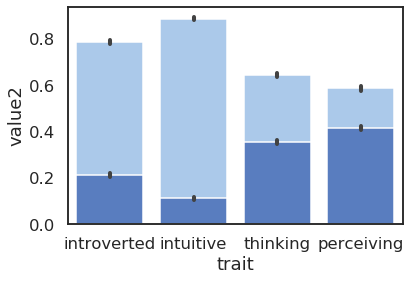

In [200]:
kus = meh[['introverted', 'intuitive', 'thinking', 'perceiving']]
kus = pd.melt(kus, var_name="trait")
kus = kus[kus["value"].notnull()]
kus['value2'] = 1 - kus['value']
print(kus)
# # Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="trait", y="value", data=kus,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="trait", y="value2", data=kus,
            label="Total", color="b")

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(x="alcohol", y="abbrev", data=crashes,
#             label="Alcohol-involved", color="b")


In [213]:
trk = kus.groupby(by=["trait"]).sum()
kar = pd.DataFrame(trk)

In [247]:
kar["trait"] = ['I/E','N/S', 'P/J', 'T/F']

AttributeError: 'AxesSubplot' object has no attribute 'set_size_inches'

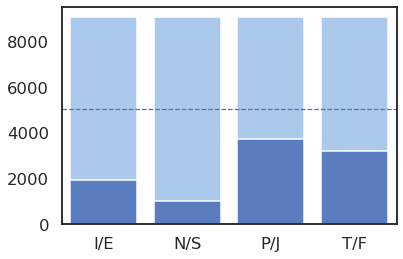

In [251]:

sns.set_color_codes("pastel")
t = sns.barplot(x="trait", y="value", data=kar,
            label="", color="b")

sns.set_color_codes("muted")
t = sns.barplot(x="trait", y="value2", data=kar,
            label="", color="b")

t.axhline(5041, ls='--',  linewidth=1.25)

t.set(xlabel='', ylabel='')

t.get_figure().savefig("mbti_kak.pdf")

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="white", context="talk")
# rs = np.random.RandomState(8)
# f, (ax3) = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

# x = np.array(['I', "E", 'N', "S" ,'T', "F", "P", 'J'])
# y1 = []
# for trait in ['introverted', 'intuitive', 'thinking', 'perceiving']:
#     er = meh[(meh[trait].notnull()) & meh[trait] == 0]
#     tr = meh[(meh[trait].notnull()) & meh[trait] == 1]
#     y1.append(meh[trait].notnull())
#     print(len(er))
# print(len(x))
# print(len(y1))

# y3 = rs.choice(meh.loc[:,'introverted'], len(meh.loc[:,'introverted']), replace=False)
# ax3 = sns.swarmplot(x=["introverted"], y=y3)
# ax3.axhline(0, color="k", clip_on=False)
# # ax3.set_ylabel("Distribution  of Mbti dimensions")
# # ax3.savefig("mbti_dimensions.png")
# ax3.get_figure().savefig("mbti.pdf")
meh2 = meh[['agreeableness', 'openness', 'conscientiousness', 'extraversion',
       'neuroticism', 'gender']]
print(meh2[:10])
meh2 = pd.melt(meh2, "gender", var_name="trait")


# sns.swarmplot(x="measurement", y="value", hue="species",
#               palette=["r", "c", "y"], data=iris)

# sns.swarmplot(x='measurement',y="introverted", hue="gender",
#               palette=["r", "c", "y"], data=meh)

   agreeableness  openness  conscientiousness  extraversion  neuroticism  \
0            NaN       NaN                NaN           NaN          NaN   
1            0.0      99.0               96.0          60.0          1.0   
2            NaN       NaN                NaN           NaN          NaN   
3            NaN       NaN                NaN           NaN          NaN   
4            NaN       NaN                NaN           NaN          NaN   
5            NaN       NaN                NaN           NaN          NaN   
6           39.0      92.0                1.0          18.0          4.0   
7           50.0      85.0               15.0          50.0         30.0   
8           50.0      85.0               50.0          85.0         50.0   
9            NaN       NaN                NaN           NaN          NaN   

  gender  
0      m  
1      m  
2    NaN  
3      f  
4    NaN  
5      t  
6      m  
7      m  
8      m  
9    NaN  
  gender          trait  value
0      m  a

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


In [177]:

meh4 = meh2[meh2['gender'] != 't']
meh4 = meh4[meh4['value'].notnull()]
meh4["gender"] = meh4.gender.fillna('u')
print(meh4)

      gender          trait  value
1          m  agreeableness    0.0
6          m  agreeableness   39.0
7          m  agreeableness   50.0
8          m  agreeableness   50.0
23         f  agreeableness   60.0
...      ...            ...    ...
51470      m    neuroticism   79.0
51471      f    neuroticism    0.0
51472      u    neuroticism    2.0
51473      u    neuroticism    4.0
51474      f    neuroticism    7.0

[7928 rows x 3 columns]


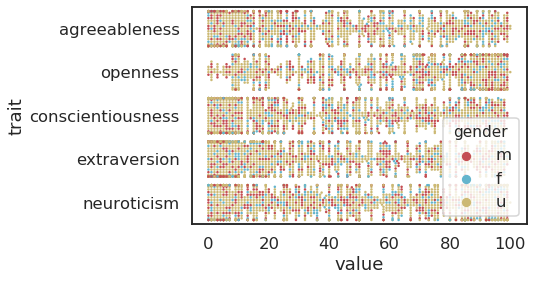

In [184]:
sns.swarmplot(x='value',y="trait", hue="gender",palette=["r", "c", "y"], size=2.5, data=meh4)

[1        99.0
6        92.0
7        85.0
8        85.0
23       67.0
         ... 
10290    92.0
10291    96.0
10292    78.0
10293    91.0
10294    42.0
Name: openness, Length: 1588, dtype: float64, 1        96.0
6         1.0
7        15.0
8        50.0
23       45.0
         ... 
10290    52.0
10291    86.0
10292    56.0
10293    88.0
10294    97.0
Name: conscientiousness, Length: 1605, dtype: float64, 1        60.0
6        18.0
7        50.0
8        85.0
23       10.0
         ... 
10290     1.0
10291    32.0
10292     0.0
10293    15.0
10294     0.0
Name: extraversion, Length: 1608, dtype: float64, 1         0.0
6        39.0
7        50.0
8        50.0
23       60.0
         ... 
10290     0.0
10291    21.0
10292    84.0
10293     6.0
10294    13.0
Name: agreeableness, Length: 1606, dtype: float64, 1         1.0
6         4.0
7        30.0
8        50.0
23       47.0
         ... 
10290    79.0
10291     0.0
10292     2.0
10293     4.0
10294     7.0
Name: neuroticism, Length: 

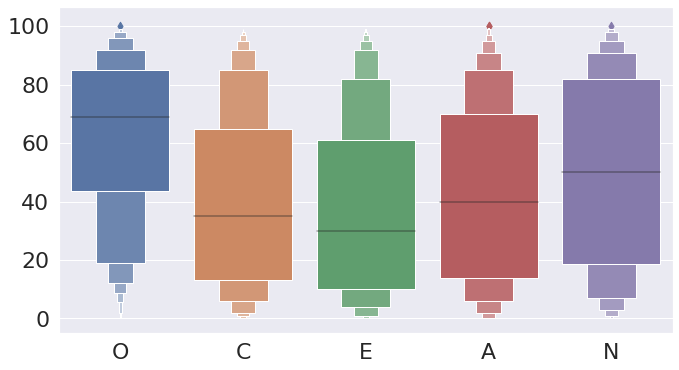

In [256]:
all_s = ['openness', 'conscientiousness', 'extraversion','agreeableness',  'neuroticism']
f, ax = plt.subplots(figsize=(11, 6))
y2 = []
for trait in all_s:
    y1 = meh[meh[trait].notnull()][trait]
    y2.append(y1)
#     print(y1)
print(y2)

sns.set(font_scale=1)
# Set up the matplotlib figure
abh = sns.boxenplot(data=y2)
abh.set_xticklabels(["O", "C", "E", "A", "N"])
ax.get_figure().savefig("big5_swarn.pdf")

In [3]:
authors_df = pd.read_csv(FEATURES_DATA_LOCATION)
comments_df = pd.read_csv(COMMENTS_LOCATION)
comments_data_df = pd.read_csv(COMMENTS_DATA_LOCATION)

/home/mbosnjak/.conda/envs/pero/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,20,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyboardInterrupt: 

In [ ]:
agree_df = authors_df['agreeableness']
open_df = authors_df['openness']
concis_df = authors_df['conscientiousness']
extra_df = authors_df['extraversion']
neuro_df = authors_df['neuroticism']

In [ ]:
authors_with_mbti = list(authors_df[authors_df.introverted.notnull()]['author'])
authors_with_big5 = list(authors_df[authors_df.agreeableness.notnull()]['author'])

In [ ]:
mbti_labels = ['introverted', 'intuitive', 'thinking', 'perceiving']
big5_labels = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

In [ ]:
#Checking the percentage of features and elements we have for each author
authors_analysis = pd.DataFrame(list(zip(list(authors_df.columns), list(authors_df.isnull().sum(axis = 0)))), columns=['feature', 'nan_count'])
authors_analysis['percentage'] = authors_analysis['nan_count']/len(authors_df)

In [16]:
features_with_nan = authors_analysis[authors_analysis['nan_count'] != 0]
features_with_nan

,feature,nan_count,percentage
1,mbti_type,1207,0.1207
2,introverted,1207,0.1207
3,intuitive,1207,0.1207
4,thinking,1207,0.1207
5,perceiving,1207,0.1207
6,gender,7134,0.7134
7,age,8256,0.8256
8,enneagram,9231,0.9231
9,country,7974,0.7974
10,state,9190,0.9190


In [17]:
a1 = authors_df['mbti_type'].isnull() 
a2 = authors_df['openness'].isnull()
authors_with_no_personality = [a[2] for a in list(zip(a1,a2, range(0,len(authors_df)))) if a[0] == True and a[1] == True]

In [18]:
authors_df.iloc[authors_with_no_personality, :15]

,author,mbti_type,introverted,intuitive,thinking,perceiving,gender,age,enneagram,country,state,type,agreeableness,openness,conscientiousness
371,ApricotAmber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,Komatik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2499,KuteKitteh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3038,NYPunk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5124,_reLight_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


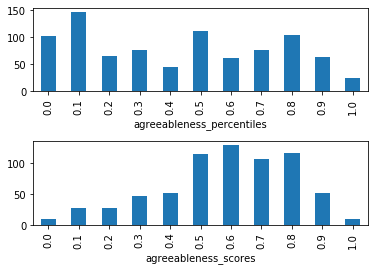

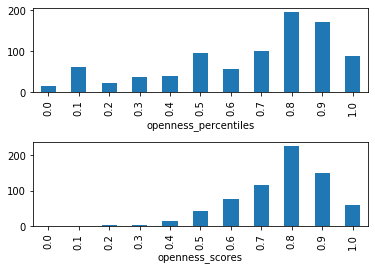

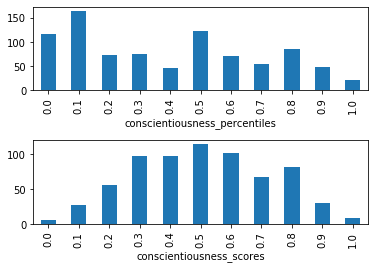

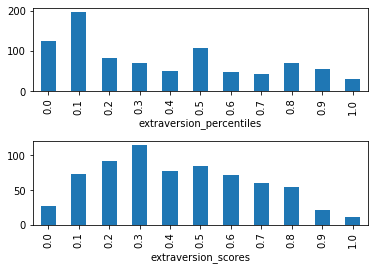

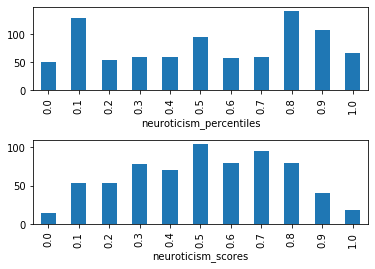

In [19]:
for big5_trait in big5_labels:
    plt.figure(1)
    plt.subplots_adjust(hspace=0.6)
    plt.subplot(211)
    authors_df[(authors_df[big5_trait].notnull()) & (authors_df.test_scale=='percentiles')][big5_trait].apply(lambda x : round(x/100,1)).value_counts().sort_index().plot.bar()
    plt.xlabel(big5_trait+'_percentiles')
    plt.subplot(212)
    authors_df[(authors_df[big5_trait].notnull()) & (authors_df.test_scale=='scores')][big5_trait].apply(lambda x : round(x/100,1)).value_counts().sort_index().plot.bar()
    plt.xlabel(big5_trait+'_scores')
    plt.show()

In [20]:
authors_with_both_persos = [a[2] for a in list(zip(a1,a2, range(0,len(authors_df)))) if a[0] == False and a[1] == False]
len(authors_with_both_persos)

366

In [21]:
for mbti_trait in mbti_labels:
    mbti_cur_per = authors_df[mbti_trait].sum()/len(authors_df)
    print(f'{mbti_trait} {mbti_cur_per} : {1-mbti_cur_per}')

introverted 0.6945 : 0.3055
intuitive 0.7787 : 0.22130000000000005
thinking 0.566 : 0.43400000000000005
perceiving 0.5156 : 0.48440000000000005


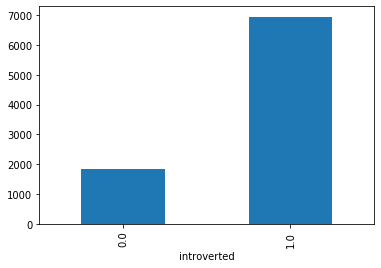

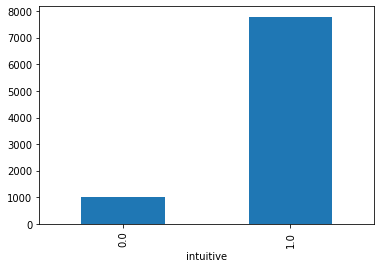

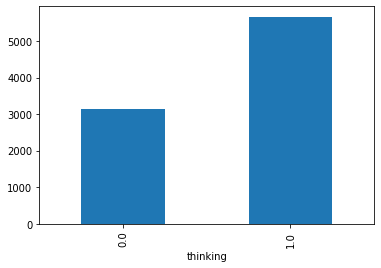

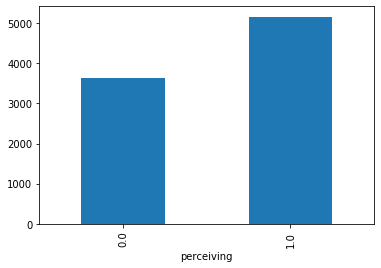

In [22]:
for mbti_trait in mbti_labels:
    authors_df.groupby([mbti_trait])[mbti_trait].count().plot.bar()
    plt.show()

In [23]:
print(len(authors_df[authors_df.test_scale == 'scores']['openness']))
print(len(authors_df[authors_df.test_scale == 'percentiles']['openness']))

730
904


In [24]:
list(authors_df.columns)

['author',
 'mbti_type',
 'introverted',
 'intuitive',
 'thinking',
 'perceiving',
 'gender',
 'age',
 'enneagram',
 'country',
 'state',
 'type',
 'agreeableness',
 'openness',
 'conscientiousness',
 'extraversion',
 'neuroticism',
 'is_description',
 'is_percentile',
 'is_score',
 'contains_details',
 'num_comments',
 'en_comments',
 'en_comments_percentage',
 'region',
 'continent',
 'country_code',
 'enneagram_type',
 'enneagram_wing',
 'is_native_english_country',
 'predicted_test',
 'test_name',
 'test_scale',
 '16pers_ta',
 'test_result_type',
 'wc',
 'help',
 'office',
 'dance',
 'money_x',
 'wedding',
 'domestic_work',
 'sleep',
 'medical_emergency',
 'cold',
 'hate',
 'cheerfulness',
 'aggression',
 'occupation',
 'envy',
 'anticipation_x',
 'family_x',
 'vacation',
 'crime',
 'attractive',
 'masculine',
 'prison',
 'health_x',
 'pride',
 'dispute',
 'nervousness',
 'government',
 'weakness',
 'horror',
 'swearing_terms',
 'leisure_x',
 'suffering',
 'royalty',
 'wealthy',
 '

In [25]:
list(comments_data_df.columns)

['0',
 'author',
 'author_flair_text',
 'body',
 'downs',
 'created_utc',
 'subreddit_id',
 'link_id',
 'parent_id',
 'score',
 'controversiality',
 'gilded',
 'id',
 'subreddit',
 'ups',
 'word_count',
 'word_count_quoteless',
 'lang',
 'flesch_kincaid_grade_level',
 'flesch_reading_ease',
 'smog_index',
 'gunning_fog_index',
 'coleman_liau_index',
 'automated_readability_index',
 'lix',
 'gulpease_index',
 'wiener_sachtextformel',
 'n_sents',
 'n_words',
 'n_chars',
 'n_syllables',
 'n_unique_words',
 'n_long_words',
 'n_monosyllable_words',
 'n_polysyllable_words']

In [32]:
all_subreddits = list(set(comments_data_df.subreddit))

In [66]:
subreddits_meta_data = pd.DataFrame(columns= ['subreddits_name', 'introverted_percentage', 'extroverted_percentage',\
                                              'intuitive_percentage', 'sensing_percentage', 'thinking_percentage',\
                                              'feeling_percentage', 'perceiving_percentage','judging_percentage',\
                                              'number_of_users', 'number_of_users_with_mbti'])

In [60]:
def add_new_subreddit_meta_data(subreddits_name, introverted, intuitive, thinking, perceiving, user_count, user_with_mbti_count):
    global subreddits_meta_data
    subreddits_meta_data = subreddits_meta_data.append({'subreddits_name' : subreddits_name,\
                                 'introverted_percentage' : introverted,\
                                 'intuitive_percentage' : intuitive,\
                                 'thinking_percentage' : thinking,\
                                 'perceiving_percentage' : perceiving,\
                                 'extroverted_percentage' : 1.0-introverted,\
                                 'sensing_percentage' : 1.0-intuitive,\
                                 'feeling_percentage' : 1.0-thinking,\
                                 'judging_percentage' : 1.0-perceiving,\
                                 'number_of_users': user_count,\
                                 'number_of_users_with_mbti' : user_with_mbti_count}, ignore_index=True)

In [68]:
for index, subreddit in enumerate(all_subreddits):
    print(f'Processing {index}...')
    all_authors_in_subreddit = list(set(comments_data_df[comments_data_df['subreddit'] == subreddit]['author']))
    all_authors_with_mbti_in_subreddit = [author for author in all_authors_in_subreddit if author in authors_with_mbti]
    count_of_all_authors = len(all_authors_in_subreddit)
    count_of_all_authors_with_perso = len(all_authors_with_mbti_in_subreddit)
    
    if len(all_authors_with_mbti_in_subreddit) == 0:
        add_new_subreddit_meta_data(subreddit, 0.0, 0.0, 0.0, 0.0, \
                                    count_of_all_authors, count_of_all_authors_with_perso)
        continue
        
    traits = []
    for mbti_trait in mbti_labels:
        trait_count = sum(authors_df[authors_df['author'].isin(all_authors_with_mbti_in_subreddit)][mbti_trait])
        traits.append(trait_count/count_of_all_authors_with_perso)
    add_new_subreddit_meta_data(subreddit, traits[0], traits[1], traits[2], traits[3], count_of_all_authors, count_of_all_authors_with_perso)
    if(index % 1000 == 0):
        subreddits_meta_data.to_csv('/home/mbosnjak/Datasets/subreddits_mbti_share_by_trait.csv')

Processing 0...
Processing 1...
Processing 2...
Processing 3...
Processing 4...
Processing 5...
Processing 6...
Processing 7...
Processing 8...
Processing 9...
Processing 10...
Processing 11...
Processing 12...
Processing 13...
Processing 14...
Processing 15...
Processing 16...
Processing 17...
Processing 18...
Processing 19...
Processing 20...
Processing 21...
Processing 22...
Processing 23...
Processing 24...
Processing 25...
Processing 26...
Processing 27...
Processing 28...
Processing 29...
Processing 30...
Processing 31...
Processing 32...
Processing 33...
Processing 34...
Processing 35...
Processing 36...
Processing 37...
Processing 38...
Processing 39...
Processing 40...
Processing 41...
Processing 42...
Processing 43...
Processing 44...
Processing 45...
Processing 46...
Processing 47...
Processing 48...
Processing 49...
Processing 50...
Processing 51...
Processing 52...
Processing 53...
Processing 54...
Processing 55...
Processing 56...
Processing 57...
Processing 58...
Process

Processing 463...
Processing 464...
Processing 465...
Processing 466...
Processing 467...
Processing 468...
Processing 469...
Processing 470...
Processing 471...
Processing 472...
Processing 473...
Processing 474...
Processing 475...
Processing 476...
Processing 477...
Processing 478...
Processing 479...
Processing 480...
Processing 481...
Processing 482...
Processing 483...
Processing 484...
Processing 485...
Processing 486...
Processing 487...
Processing 488...
Processing 489...
Processing 490...
Processing 491...
Processing 492...
Processing 493...
Processing 494...
Processing 495...
Processing 496...
Processing 497...
Processing 498...
Processing 499...
Processing 500...
Processing 501...
Processing 502...
Processing 503...
Processing 504...
Processing 505...
Processing 506...
Processing 507...
Processing 508...
Processing 509...
Processing 510...
Processing 511...
Processing 512...
Processing 513...
Processing 514...
Processing 515...
Processing 516...
Processing 517...
Processing

Processing 920...
Processing 921...
Processing 922...
Processing 923...
Processing 924...
Processing 925...
Processing 926...
Processing 927...
Processing 928...
Processing 929...
Processing 930...
Processing 931...
Processing 932...
Processing 933...
Processing 934...
Processing 935...
Processing 936...
Processing 937...
Processing 938...
Processing 939...
Processing 940...
Processing 941...
Processing 942...
Processing 943...
Processing 944...
Processing 945...
Processing 946...
Processing 947...
Processing 948...
Processing 949...
Processing 950...
Processing 951...
Processing 952...
Processing 953...
Processing 954...
Processing 955...
Processing 956...
Processing 957...
Processing 958...
Processing 959...
Processing 960...
Processing 961...
Processing 962...
Processing 963...
Processing 964...
Processing 965...
Processing 966...
Processing 967...
Processing 968...
Processing 969...
Processing 970...
Processing 971...
Processing 972...
Processing 973...
Processing 974...
Processing

Processing 1455...
Processing 1456...
Processing 1457...
Processing 1458...
Processing 1459...
Processing 1460...
Processing 1461...
Processing 1462...
Processing 1463...
Processing 1464...
Processing 1465...
Processing 1466...
Processing 1467...
Processing 1468...
Processing 1469...
Processing 1470...
Processing 1471...
Processing 1472...
Processing 1473...
Processing 1474...
Processing 1475...
Processing 1476...
Processing 1477...
Processing 1478...
Processing 1479...
Processing 1480...
Processing 1481...
Processing 1482...
Processing 1483...
Processing 1484...
Processing 1485...
Processing 1486...
Processing 1487...
Processing 1488...
Processing 1489...
Processing 1490...
Processing 1491...
Processing 1492...
Processing 1493...
Processing 1494...
Processing 1495...
Processing 1496...
Processing 1497...
Processing 1498...
Processing 1499...
Processing 1500...
Processing 1501...
Processing 1502...
Processing 1503...
Processing 1504...
Processing 1505...
Processing 1506...
Processing 1

Processing 1887...
Processing 1888...
Processing 1889...
Processing 1890...
Processing 1891...
Processing 1892...
Processing 1893...
Processing 1894...
Processing 1895...
Processing 1896...
Processing 1897...
Processing 1898...
Processing 1899...
Processing 1900...
Processing 1901...
Processing 1902...
Processing 1903...
Processing 1904...
Processing 1905...
Processing 1906...
Processing 1907...
Processing 1908...
Processing 1909...
Processing 1910...
Processing 1911...
Processing 1912...
Processing 1913...
Processing 1914...
Processing 1915...
Processing 1916...
Processing 1917...
Processing 1918...
Processing 1919...
Processing 1920...
Processing 1921...
Processing 1922...
Processing 1923...
Processing 1924...
Processing 1925...
Processing 1926...
Processing 1927...
Processing 1928...
Processing 1929...
Processing 1930...
Processing 1931...
Processing 1932...
Processing 1933...
Processing 1934...
Processing 1935...
Processing 1936...
Processing 1937...
Processing 1938...
Processing 1

Processing 2320...
Processing 2321...
Processing 2322...
Processing 2323...
Processing 2324...
Processing 2325...
Processing 2326...
Processing 2327...
Processing 2328...
Processing 2329...
Processing 2330...
Processing 2331...
Processing 2332...
Processing 2333...
Processing 2334...
Processing 2335...
Processing 2336...
Processing 2337...
Processing 2338...
Processing 2339...
Processing 2340...
Processing 2341...
Processing 2342...
Processing 2343...
Processing 2344...
Processing 2345...
Processing 2346...
Processing 2347...
Processing 2348...
Processing 2349...
Processing 2350...
Processing 2351...
Processing 2352...
Processing 2353...
Processing 2354...
Processing 2355...
Processing 2356...
Processing 2357...
Processing 2358...
Processing 2359...
Processing 2360...
Processing 2361...
Processing 2362...
Processing 2363...
Processing 2364...
Processing 2365...
Processing 2366...
Processing 2367...
Processing 2368...
Processing 2369...
Processing 2370...
Processing 2371...
Processing 2

Processing 2752...
Processing 2753...
Processing 2754...
Processing 2755...
Processing 2756...
Processing 2757...
Processing 2758...
Processing 2759...
Processing 2760...
Processing 2761...
Processing 2762...
Processing 2763...
Processing 2764...
Processing 2765...
Processing 2766...
Processing 2767...
Processing 2768...
Processing 2769...
Processing 2770...
Processing 2771...
Processing 2772...
Processing 2773...
Processing 2774...
Processing 2775...
Processing 2776...
Processing 2777...
Processing 2778...
Processing 2779...
Processing 2780...
Processing 2781...
Processing 2782...
Processing 2783...
Processing 2784...
Processing 2785...
Processing 2786...
Processing 2787...
Processing 2788...
Processing 2789...
Processing 2790...
Processing 2791...
Processing 2792...
Processing 2793...
Processing 2794...
Processing 2795...
Processing 2796...
Processing 2797...
Processing 2798...
Processing 2799...
Processing 2800...
Processing 2801...
Processing 2802...
Processing 2803...
Processing 2

Processing 3184...
Processing 3185...
Processing 3186...
Processing 3187...
Processing 3188...
Processing 3189...
Processing 3190...
Processing 3191...
Processing 3192...
Processing 3193...
Processing 3194...
Processing 3195...
Processing 3196...
Processing 3197...
Processing 3198...
Processing 3199...
Processing 3200...
Processing 3201...
Processing 3202...
Processing 3203...
Processing 3204...
Processing 3205...
Processing 3206...
Processing 3207...
Processing 3208...
Processing 3209...
Processing 3210...
Processing 3211...
Processing 3212...
Processing 3213...
Processing 3214...
Processing 3215...
Processing 3216...
Processing 3217...
Processing 3218...
Processing 3219...
Processing 3220...
Processing 3221...
Processing 3222...
Processing 3223...
Processing 3224...
Processing 3225...
Processing 3226...
Processing 3227...
Processing 3228...
Processing 3229...
Processing 3230...
Processing 3231...
Processing 3232...
Processing 3233...
Processing 3234...
Processing 3235...
Processing 3

Processing 3617...
Processing 3618...
Processing 3619...
Processing 3620...
Processing 3621...
Processing 3622...
Processing 3623...
Processing 3624...
Processing 3625...
Processing 3626...
Processing 3627...
Processing 3628...
Processing 3629...
Processing 3630...
Processing 3631...
Processing 3632...
Processing 3633...
Processing 3634...
Processing 3635...
Processing 3636...
Processing 3637...
Processing 3638...
Processing 3639...
Processing 3640...
Processing 3641...
Processing 3642...
Processing 3643...
Processing 3644...
Processing 3645...
Processing 3646...
Processing 3647...
Processing 3648...
Processing 3649...
Processing 3650...
Processing 3651...
Processing 3652...
Processing 3653...
Processing 3654...
Processing 3655...
Processing 3656...
Processing 3657...
Processing 3658...
Processing 3659...
Processing 3660...
Processing 3661...
Processing 3662...
Processing 3663...
Processing 3664...
Processing 3665...
Processing 3666...
Processing 3667...
Processing 3668...
Processing 3

Processing 4050...
Processing 4051...
Processing 4052...
Processing 4053...
Processing 4054...
Processing 4055...
Processing 4056...
Processing 4057...
Processing 4058...
Processing 4059...
Processing 4060...
Processing 4061...
Processing 4062...
Processing 4063...
Processing 4064...
Processing 4065...
Processing 4066...
Processing 4067...
Processing 4068...
Processing 4069...
Processing 4070...
Processing 4071...
Processing 4072...
Processing 4073...
Processing 4074...
Processing 4075...
Processing 4076...
Processing 4077...
Processing 4078...
Processing 4079...
Processing 4080...
Processing 4081...
Processing 4082...
Processing 4083...
Processing 4084...
Processing 4085...
Processing 4086...
Processing 4087...
Processing 4088...
Processing 4089...
Processing 4090...
Processing 4091...
Processing 4092...
Processing 4093...
Processing 4094...
Processing 4095...
Processing 4096...
Processing 4097...
Processing 4098...
Processing 4099...
Processing 4100...
Processing 4101...
Processing 4

Processing 4483...
Processing 4484...
Processing 4485...
Processing 4486...
Processing 4487...
Processing 4488...
Processing 4489...
Processing 4490...
Processing 4491...
Processing 4492...
Processing 4493...
Processing 4494...
Processing 4495...
Processing 4496...
Processing 4497...
Processing 4498...
Processing 4499...
Processing 4500...
Processing 4501...
Processing 4502...
Processing 4503...
Processing 4504...
Processing 4505...
Processing 4506...
Processing 4507...
Processing 4508...
Processing 4509...
Processing 4510...
Processing 4511...
Processing 4512...
Processing 4513...
Processing 4514...
Processing 4515...
Processing 4516...
Processing 4517...
Processing 4518...
Processing 4519...
Processing 4520...
Processing 4521...
Processing 4522...
Processing 4523...
Processing 4524...
Processing 4525...
Processing 4526...
Processing 4527...
Processing 4528...
Processing 4529...
Processing 4530...
Processing 4531...
Processing 4532...
Processing 4533...
Processing 4534...
Processing 4

Processing 4916...
Processing 4917...
Processing 4918...
Processing 4919...
Processing 4920...
Processing 4921...
Processing 4922...
Processing 4923...
Processing 4924...
Processing 4925...
Processing 4926...
Processing 4927...
Processing 4928...
Processing 4929...
Processing 4930...
Processing 4931...
Processing 4932...
Processing 4933...
Processing 4934...
Processing 4935...
Processing 4936...
Processing 4937...
Processing 4938...
Processing 4939...
Processing 4940...
Processing 4941...
Processing 4942...
Processing 4943...
Processing 4944...
Processing 4945...
Processing 4946...
Processing 4947...
Processing 4948...
Processing 4949...
Processing 4950...
Processing 4951...
Processing 4952...
Processing 4953...
Processing 4954...
Processing 4955...
Processing 4956...
Processing 4957...
Processing 4958...
Processing 4959...
Processing 4960...
Processing 4961...
Processing 4962...
Processing 4963...
Processing 4964...
Processing 4965...
Processing 4966...
Processing 4967...
Processing 4

Processing 5348...
Processing 5349...
Processing 5350...
Processing 5351...
Processing 5352...
Processing 5353...
Processing 5354...
Processing 5355...
Processing 5356...
Processing 5357...
Processing 5358...
Processing 5359...
Processing 5360...
Processing 5361...
Processing 5362...
Processing 5363...
Processing 5364...
Processing 5365...
Processing 5366...
Processing 5367...
Processing 5368...
Processing 5369...
Processing 5370...
Processing 5371...
Processing 5372...
Processing 5373...
Processing 5374...
Processing 5375...
Processing 5376...
Processing 5377...
Processing 5378...
Processing 5379...
Processing 5380...
Processing 5381...
Processing 5382...
Processing 5383...
Processing 5384...
Processing 5385...
Processing 5386...
Processing 5387...
Processing 5388...
Processing 5389...
Processing 5390...
Processing 5391...
Processing 5392...
Processing 5393...
Processing 5394...
Processing 5395...
Processing 5396...
Processing 5397...
Processing 5398...
Processing 5399...
Processing 5

Processing 5781...
Processing 5782...
Processing 5783...
Processing 5784...
Processing 5785...
Processing 5786...
Processing 5787...
Processing 5788...
Processing 5789...
Processing 5790...
Processing 5791...
Processing 5792...
Processing 5793...
Processing 5794...
Processing 5795...
Processing 5796...
Processing 5797...
Processing 5798...
Processing 5799...
Processing 5800...
Processing 5801...
Processing 5802...
Processing 5803...
Processing 5804...
Processing 5805...
Processing 5806...
Processing 5807...
Processing 5808...
Processing 5809...
Processing 5810...
Processing 5811...
Processing 5812...
Processing 5813...
Processing 5814...
Processing 5815...
Processing 5816...
Processing 5817...
Processing 5818...
Processing 5819...
Processing 5820...
Processing 5821...
Processing 5822...
Processing 5823...
Processing 5824...
Processing 5825...
Processing 5826...
Processing 5827...
Processing 5828...
Processing 5829...
Processing 5830...
Processing 5831...
Processing 5832...
Processing 5

Processing 6213...
Processing 6214...
Processing 6215...
Processing 6216...
Processing 6217...
Processing 6218...
Processing 6219...
Processing 6220...
Processing 6221...
Processing 6222...
Processing 6223...
Processing 6224...
Processing 6225...
Processing 6226...
Processing 6227...
Processing 6228...
Processing 6229...
Processing 6230...
Processing 6231...
Processing 6232...
Processing 6233...
Processing 6234...
Processing 6235...
Processing 6236...
Processing 6237...
Processing 6238...
Processing 6239...
Processing 6240...
Processing 6241...
Processing 6242...
Processing 6243...
Processing 6244...
Processing 6245...
Processing 6246...
Processing 6247...
Processing 6248...
Processing 6249...
Processing 6250...
Processing 6251...
Processing 6252...
Processing 6253...
Processing 6254...
Processing 6255...
Processing 6256...
Processing 6257...
Processing 6258...
Processing 6259...
Processing 6260...
Processing 6261...
Processing 6262...
Processing 6263...
Processing 6264...
Processing 6

Processing 6645...
Processing 6646...
Processing 6647...
Processing 6648...
Processing 6649...
Processing 6650...
Processing 6651...
Processing 6652...
Processing 6653...
Processing 6654...
Processing 6655...
Processing 6656...
Processing 6657...
Processing 6658...
Processing 6659...
Processing 6660...
Processing 6661...
Processing 6662...
Processing 6663...
Processing 6664...
Processing 6665...
Processing 6666...
Processing 6667...
Processing 6668...
Processing 6669...
Processing 6670...
Processing 6671...
Processing 6672...
Processing 6673...
Processing 6674...
Processing 6675...
Processing 6676...
Processing 6677...
Processing 6678...
Processing 6679...
Processing 6680...
Processing 6681...
Processing 6682...
Processing 6683...
Processing 6684...
Processing 6685...
Processing 6686...
Processing 6687...
Processing 6688...
Processing 6689...
Processing 6690...
Processing 6691...
Processing 6692...
Processing 6693...
Processing 6694...
Processing 6695...
Processing 6696...
Processing 6

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Processing 25800...
Processing 25801...
Processing 25802...
Processing 25803...
Processing 25804...
Processing 25805...
Processing 25806...
Processing 25807...
Processing 25808...
Processing 25809...
Processing 25810...
Processing 25811...
Processing 25812...
Processing 25813...
Processing 25814...
Processing 25815...
Processing 25816...
Processing 25817...
Processing 25818...
Processing 25819...
Processing 25820...
Processing 25821...
Processing 25822...
Processing 25823...
Processing 25824...
Processing 25825...
Processing 25826...
Processing 25827...
Processing 25828...
Processing 25829...
Processing 25830...
Processing 25831...
Processing 25832...
Processing 25833...
Processing 25834...
Processing 25835...
Processing 25836...
Processing 25837...
Processing 25838...
Processing 25839...
Processing 25840...
Processing 25841...
Processing 25842...
Processing 25843...
Processing 25844...
Processing 25845...
Processing 25846...
Processing 25847...
Processing 25848...
Processing 25849...


Processing 26211...
Processing 26212...
Processing 26213...
Processing 26214...
Processing 26215...
Processing 26216...
Processing 26217...
Processing 26218...
Processing 26219...
Processing 26220...
Processing 26221...
Processing 26222...
Processing 26223...
Processing 26224...
Processing 26225...
Processing 26226...
Processing 26227...
Processing 26228...
Processing 26229...
Processing 26230...
Processing 26231...
Processing 26232...
Processing 26233...
Processing 26234...
Processing 26235...
Processing 26236...
Processing 26237...
Processing 26238...
Processing 26239...
Processing 26240...
Processing 26241...
Processing 26242...
Processing 26243...
Processing 26244...
Processing 26245...
Processing 26246...
Processing 26247...
Processing 26248...
Processing 26249...
Processing 26250...
Processing 26251...
Processing 26252...
Processing 26253...
Processing 26254...
Processing 26255...
Processing 26256...
Processing 26257...
Processing 26258...
Processing 26259...
Processing 26260...


Processing 26622...
Processing 26623...
Processing 26624...
Processing 26625...
Processing 26626...
Processing 26627...
Processing 26628...
Processing 26629...
Processing 26630...
Processing 26631...
Processing 26632...
Processing 26633...
Processing 26634...
Processing 26635...
Processing 26636...
Processing 26637...
Processing 26638...
Processing 26639...
Processing 26640...
Processing 26641...
Processing 26642...
Processing 26643...
Processing 26644...
Processing 26645...
Processing 26646...
Processing 26647...
Processing 26648...
Processing 26649...
Processing 26650...
Processing 26651...
Processing 26652...
Processing 26653...
Processing 26654...
Processing 26655...
Processing 26656...
Processing 26657...
Processing 26658...
Processing 26659...
Processing 26660...
Processing 26661...
Processing 26662...
Processing 26663...
Processing 26664...
Processing 26665...
Processing 26666...
Processing 26667...
Processing 26668...
Processing 26669...
Processing 26670...
Processing 26671...


Processing 27032...
Processing 27033...
Processing 27034...
Processing 27035...
Processing 27036...
Processing 27037...
Processing 27038...
Processing 27039...
Processing 27040...
Processing 27041...
Processing 27042...
Processing 27043...
Processing 27044...
Processing 27045...
Processing 27046...
Processing 27047...
Processing 27048...
Processing 27049...
Processing 27050...
Processing 27051...
Processing 27052...
Processing 27053...
Processing 27054...
Processing 27055...
Processing 27056...
Processing 27057...
Processing 27058...
Processing 27059...
Processing 27060...
Processing 27061...
Processing 27062...
Processing 27063...
Processing 27064...
Processing 27065...
Processing 27066...
Processing 27067...
Processing 27068...
Processing 27069...
Processing 27070...
Processing 27071...
Processing 27072...
Processing 27073...
Processing 27074...
Processing 27075...
Processing 27076...
Processing 27077...
Processing 27078...
Processing 27079...
Processing 27080...
Processing 27081...


Processing 27442...
Processing 27443...
Processing 27444...
Processing 27445...
Processing 27446...
Processing 27447...
Processing 27448...
Processing 27449...
Processing 27450...
Processing 27451...
Processing 27452...
Processing 27453...
Processing 27454...
Processing 27455...
Processing 27456...
Processing 27457...
Processing 27458...
Processing 27459...
Processing 27460...
Processing 27461...
Processing 27462...
Processing 27463...
Processing 27464...
Processing 27465...
Processing 27466...
Processing 27467...
Processing 27468...
Processing 27469...
Processing 27470...
Processing 27471...
Processing 27472...
Processing 27473...
Processing 27474...
Processing 27475...
Processing 27476...
Processing 27477...
Processing 27478...
Processing 27479...
Processing 27480...
Processing 27481...
Processing 27482...
Processing 27483...
Processing 27484...
Processing 27485...
Processing 27486...
Processing 27487...
Processing 27488...
Processing 27489...
Processing 27490...
Processing 27491...


Processing 27852...
Processing 27853...
Processing 27854...
Processing 27855...
Processing 27856...
Processing 27857...
Processing 27858...
Processing 27859...
Processing 27860...
Processing 27861...
Processing 27862...
Processing 27863...
Processing 27864...
Processing 27865...
Processing 27866...
Processing 27867...
Processing 27868...
Processing 27869...
Processing 27870...
Processing 27871...
Processing 27872...
Processing 27873...
Processing 27874...
Processing 27875...
Processing 27876...
Processing 27877...
Processing 27878...
Processing 27879...
Processing 27880...
Processing 27881...
Processing 27882...
Processing 27883...
Processing 27884...
Processing 27885...
Processing 27886...
Processing 27887...
Processing 27888...
Processing 27889...
Processing 27890...
Processing 27891...
Processing 27892...
Processing 27893...
Processing 27894...
Processing 27895...
Processing 27896...
Processing 27897...
Processing 27898...
Processing 27899...
Processing 27900...
Processing 27901...


Processing 28262...
Processing 28263...
Processing 28264...
Processing 28265...
Processing 28266...
Processing 28267...
Processing 28268...
Processing 28269...
Processing 28270...
Processing 28271...
Processing 28272...
Processing 28273...
Processing 28274...
Processing 28275...
Processing 28276...
Processing 28277...
Processing 28278...
Processing 28279...
Processing 28280...
Processing 28281...
Processing 28282...
Processing 28283...
Processing 28284...
Processing 28285...
Processing 28286...
Processing 28287...
Processing 28288...
Processing 28289...
Processing 28290...
Processing 28291...
Processing 28292...
Processing 28293...
Processing 28294...
Processing 28295...
Processing 28296...
Processing 28297...
Processing 28298...
Processing 28299...
Processing 28300...
Processing 28301...
Processing 28302...
Processing 28303...
Processing 28304...
Processing 28305...
Processing 28306...
Processing 28307...
Processing 28308...
Processing 28309...
Processing 28310...
Processing 28311...


Processing 28673...
Processing 28674...
Processing 28675...
Processing 28676...
Processing 28677...
Processing 28678...
Processing 28679...
Processing 28680...
Processing 28681...
Processing 28682...
Processing 28683...
Processing 28684...
Processing 28685...
Processing 28686...
Processing 28687...
Processing 28688...
Processing 28689...
Processing 28690...
Processing 28691...
Processing 28692...
Processing 28693...
Processing 28694...
Processing 28695...
Processing 28696...
Processing 28697...
Processing 28698...
Processing 28699...
Processing 28700...
Processing 28701...
Processing 28702...
Processing 28703...
Processing 28704...
Processing 28705...
Processing 28706...
Processing 28707...
Processing 28708...
Processing 28709...
Processing 28710...
Processing 28711...
Processing 28712...
Processing 28713...
Processing 28714...
Processing 28715...
Processing 28716...
Processing 28717...
Processing 28718...
Processing 28719...
Processing 28720...
Processing 28721...
Processing 28722...


Processing 29083...
Processing 29084...
Processing 29085...
Processing 29086...
Processing 29087...
Processing 29088...
Processing 29089...
Processing 29090...
Processing 29091...
Processing 29092...
Processing 29093...
Processing 29094...
Processing 29095...
Processing 29096...
Processing 29097...
Processing 29098...
Processing 29099...
Processing 29100...
Processing 29101...
Processing 29102...
Processing 29103...
Processing 29104...
Processing 29105...
Processing 29106...
Processing 29107...
Processing 29108...
Processing 29109...
Processing 29110...
Processing 29111...
Processing 29112...
Processing 29113...
Processing 29114...
Processing 29115...
Processing 29116...
Processing 29117...
Processing 29118...
Processing 29119...
Processing 29120...
Processing 29121...
Processing 29122...
Processing 29123...
Processing 29124...
Processing 29125...
Processing 29126...
Processing 29127...
Processing 29128...
Processing 29129...
Processing 29130...
Processing 29131...
Processing 29132...


Processing 29494...
Processing 29495...
Processing 29496...
Processing 29497...
Processing 29498...
Processing 29499...
Processing 29500...
Processing 29501...
Processing 29502...
Processing 29503...
Processing 29504...
Processing 29505...
Processing 29506...
Processing 29507...
Processing 29508...
Processing 29509...
Processing 29510...
Processing 29511...
Processing 29512...
Processing 29513...
Processing 29514...
Processing 29515...
Processing 29516...
Processing 29517...
Processing 29518...
Processing 29519...
Processing 29520...
Processing 29521...
Processing 29522...
Processing 29523...
Processing 29524...
Processing 29525...
Processing 29526...
Processing 29527...
Processing 29528...
Processing 29529...
Processing 29530...
Processing 29531...
Processing 29532...
Processing 29533...
Processing 29534...
Processing 29535...
Processing 29536...
Processing 29537...
Processing 29538...
Processing 29539...
Processing 29540...
Processing 29541...
Processing 29542...
Processing 29543...


Processing 29905...
Processing 29906...
Processing 29907...
Processing 29908...
Processing 29909...
Processing 29910...
Processing 29911...
Processing 29912...
Processing 29913...
Processing 29914...
Processing 29915...
Processing 29916...
Processing 29917...
Processing 29918...
Processing 29919...
Processing 29920...
Processing 29921...
Processing 29922...
Processing 29923...
Processing 29924...
Processing 29925...
Processing 29926...
Processing 29927...
Processing 29928...
Processing 29929...
Processing 29930...
Processing 29931...
Processing 29932...
Processing 29933...
Processing 29934...
Processing 29935...
Processing 29936...
Processing 29937...
Processing 29938...
Processing 29939...
Processing 29940...
Processing 29941...
Processing 29942...
Processing 29943...
Processing 29944...
Processing 29945...
Processing 29946...
Processing 29947...
Processing 29948...
Processing 29949...
Processing 29950...
Processing 29951...
Processing 29952...
Processing 29953...
Processing 29954...


Processing 30316...
Processing 30317...
Processing 30318...
Processing 30319...
Processing 30320...
Processing 30321...
Processing 30322...
Processing 30323...
Processing 30324...
Processing 30325...
Processing 30326...
Processing 30327...
Processing 30328...
Processing 30329...
Processing 30330...
Processing 30331...
Processing 30332...
Processing 30333...
Processing 30334...
Processing 30335...
Processing 30336...
Processing 30337...
Processing 30338...
Processing 30339...
Processing 30340...
Processing 30341...
Processing 30342...
Processing 30343...
Processing 30344...
Processing 30345...
Processing 30346...
Processing 30347...
Processing 30348...
Processing 30349...
Processing 30350...
Processing 30351...
Processing 30352...
Processing 30353...
Processing 30354...
Processing 30355...
Processing 30356...
Processing 30357...
Processing 30358...
Processing 30359...
Processing 30360...
Processing 30361...
Processing 30362...
Processing 30363...
Processing 30364...
Processing 30365...


Processing 30726...
Processing 30727...
Processing 30728...
Processing 30729...
Processing 30730...
Processing 30731...
Processing 30732...
Processing 30733...
Processing 30734...
Processing 30735...
Processing 30736...
Processing 30737...
Processing 30738...
Processing 30739...
Processing 30740...
Processing 30741...
Processing 30742...
Processing 30743...
Processing 30744...
Processing 30745...
Processing 30746...
Processing 30747...
Processing 30748...
Processing 30749...
Processing 30750...
Processing 30751...
Processing 30752...
Processing 30753...
Processing 30754...
Processing 30755...
Processing 30756...
Processing 30757...
Processing 30758...
Processing 30759...
Processing 30760...
Processing 30761...
Processing 30762...
Processing 30763...
Processing 30764...
Processing 30765...
Processing 30766...
Processing 30767...
Processing 30768...
Processing 30769...
Processing 30770...
Processing 30771...
Processing 30772...
Processing 30773...
Processing 30774...
Processing 30775...


Processing 31136...
Processing 31137...
Processing 31138...
Processing 31139...
Processing 31140...
Processing 31141...
Processing 31142...
Processing 31143...
Processing 31144...
Processing 31145...
Processing 31146...
Processing 31147...
Processing 31148...
Processing 31149...
Processing 31150...
Processing 31151...
Processing 31152...
Processing 31153...
Processing 31154...
Processing 31155...
Processing 31156...
Processing 31157...
Processing 31158...
Processing 31159...
Processing 31160...
Processing 31161...
Processing 31162...
Processing 31163...
Processing 31164...
Processing 31165...
Processing 31166...
Processing 31167...
Processing 31168...
Processing 31169...
Processing 31170...
Processing 31171...
Processing 31172...
Processing 31173...
Processing 31174...
Processing 31175...
Processing 31176...
Processing 31177...
Processing 31178...
Processing 31179...
Processing 31180...
Processing 31181...
Processing 31182...
Processing 31183...
Processing 31184...
Processing 31185...


Processing 31547...
Processing 31548...
Processing 31549...
Processing 31550...
Processing 31551...
Processing 31552...
Processing 31553...
Processing 31554...
Processing 31555...
Processing 31556...
Processing 31557...
Processing 31558...
Processing 31559...
Processing 31560...
Processing 31561...
Processing 31562...
Processing 31563...
Processing 31564...
Processing 31565...
Processing 31566...
Processing 31567...
Processing 31568...
Processing 31569...
Processing 31570...
Processing 31571...
Processing 31572...
Processing 31573...
Processing 31574...
Processing 31575...
Processing 31576...
Processing 31577...
Processing 31578...
Processing 31579...
Processing 31580...
Processing 31581...
Processing 31582...
Processing 31583...
Processing 31584...
Processing 31585...
Processing 31586...
Processing 31587...
Processing 31588...
Processing 31589...
Processing 31590...
Processing 31591...
Processing 31592...
Processing 31593...
Processing 31594...
Processing 31595...
Processing 31596...


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [99]:
most_frequent_subreddits = pd.DataFrame()
mbti_traits = ['introverts', 'extroverts',  'intuitive', 'sensing', 'thinking', 'feeling', 'perceiving', 'judging']
subreddits_meta_data.columns
for trait, traits_info in zip (mbti_traits, ['introverted_percentage', 'extroverted_percentage',\
       'intuitive_percentage', 'sensing_percentage', 'thinking_percentage',\
       'feeling_percentage', 'perceiving_percentage', 'judging_percentage']):
    most_frequent_subreddits[trait] = subreddits_meta_data[subreddits_meta_data['number_of_users_with_mbti'] > 100].sort_values(by=[traits_info], ascending=False)[:50]['subreddits_name'].values

In [100]:
most_frequent_subreddits

,introverts,extroverts,intuitive,sensing,thinking,feeling,perceiving,judging
0,INFPmusic,estp,INFPmusic,istp,INTPmusic,INFPmusic,INTPmusic,2X_INTJ
1,introvert,entj,INTPmusic,ISTJ,2X_INTJ,infp,INFPmusic,intj
2,INTPmusic,ENFP,2X_INTJ,isfp,btc,infj,INTP,infj
3,2X_INTJ,ESTJ,iiiiiiitttttttttttt,estp,compsci,isfp,istp,ISTJ
4,firefox,enfj,Cinemagraphs,sensor,EngineeringPorn,astrology,infp,GradSchool
5,hacking,entp,fireemblem,isfj,homelab,birthcontrol,isfp,AskWomenOver30
6,discordapp,ESFP,linux4noobs,ESFP,arduino,ENFP,explainlikeIAmA,IntuitiveDominant
7,socialanxiety,ESFJ,OCPoetry,ESTJ,linux4noobs,enfj,feedthebeast,Baking
8,Astronomy,MBTIPlus,learnpython,MBTIPlus,GoldandBlack,FreeCompliments,glitch_art,camping
9,iiiiiiitttttttttttt,weddingplanning,Poetry,AskDocs,CGPGrey,weddingplanning,LSD,weddingplanning


In [76]:
top_extroverted_subreddits

28055                  estp
12819                  entj
8908                   ENFP
19708                  ESTJ
26693                  enfj
2281                   entp
37408                  ESFP
3085            advertising
28336              brisbane
37888                  ESFJ
5213        NotHowDrugsWork
1004           VideoEditing
20382             Bandnames
41056              Swimming
16056             Wordpress
40140           MakeupRehab
32705              BreakUps
37925              highdeas
22673                 Stims
31022            consulting
36085       PokemonGoMystic
5979                wedding
10437       swoleacceptance
1843               MBTIPlus
25237          RedPillWomen
25613       weddingplanning
33910         muacirclejerk
22243             cocktails
27463        RelayForReddit
32938            APStudents
18975       muacjdiscussion
2135         whiteknighting
18810            humblebrag
7166      researchchemicals
20773            shittyMBTI
4335              fi